In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from IPython.display import display

plt.style.use('fivethirtyeight')
sns.set_context("notebook")

In [2]:
import urllib.request
import os.path
import zipfile

data_url = "https://www.ssa.gov/oact/babynames/state/namesbystate.zip"
local_filename = "babynamesbystate.zip"
if not os.path.exists(local_filename): # if the data exists don't download again
    with urllib.request.urlopen(data_url) as resp, open(local_filename, 'wb') as f:
        f.write(resp.read())

zf = zipfile.ZipFile(local_filename, 'r')

ca_name = 'CA.TXT'
field_names = ['State', 'Sex', 'Year', 'Name', 'Count']
with zf.open(ca_name) as fh:
    babynames = pd.read_csv(fh, header=None, names=field_names)

babynames.sample(5)

,State,Sex,Year,Name,Count
177039,CA,F,2007,Lindsay,142
23726,CA,F,1946,Goldie,5
203488,CA,F,2013,Kaylene,13
20602,CA,F,1943,Nyla,5
200740,CA,F,2012,Dasia,6


In [3]:
babynames[babynames["Year"] == 2018].sort_values(by = "Count", ascending = False).head(5)

,State,Sex,Year,Name,Count
221179,CA,F,2018,Emma,2746
389400,CA,M,2018,Noah,2571
221180,CA,F,2018,Mia,2502
221181,CA,F,2018,Olivia,2467
389401,CA,M,2018,Liam,2415


In [4]:
babynames[babynames["Year"] == 2018].sort_values(by = "Count").tail(5)

,State,Sex,Year,Name,Count
389401,CA,M,2018,Liam,2415
221181,CA,F,2018,Olivia,2467
221180,CA,F,2018,Mia,2502
389400,CA,M,2018,Noah,2571
221179,CA,F,2018,Emma,2746


Goal 2: Find baby names that start with j.

In [5]:
babynames["Name"].head(20)

0          Mary
1         Helen
2       Dorothy
3      Margaret
4       Frances
5          Ruth
6        Evelyn
7         Alice
8      Virginia
9     Elizabeth
10     Florence
11        Marie
12      Mildred
13         Rose
14        Hazel
15       Louise
16    Josephine
17      Lucille
18        Grace
19       Gladys
Name: Name, dtype: object

In [9]:
starts_with_j = [ x.startswith('J') for x in babynames["Name"]]
#starts_with_j = [ x[0] == 'J'       for x in babynames["Name"]]  # Alternative. Why?
starts_with_j[:5]

[False, False, False, False, False]

In [10]:
j_names = babynames[ [x.startswith('J') for x in babynames["Name"]] ]
j_names.head(5)

,State,Sex,Year,Name,Count
16,CA,F,1910,Josephine,66
44,CA,F,1910,Jean,35
46,CA,F,1910,Jessie,32
59,CA,F,1910,Julia,28
66,CA,F,1910,Juanita,25


In [11]:
s = babynames["Name"].str
n = "Jane" # a Simple string, so we can compare...

In [12]:
babynames["Name"].str.startswith('J').head(10)

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: Name, dtype: bool

In [13]:
starts_with_j = babynames["Name"].str.startswith('J')
starts_with_j.head(10)

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: Name, dtype: bool

In [14]:
babynames[babynames["Name"].str.startswith('J')].sample(5)

,State,Sex,Year,Name,Count
241348,CA,M,1924,Julian,32
181870,CA,F,2008,Jaylynn,43
399046,CA,M,2021,Jadon,18
291101,CA,M,1978,Jody,38
399291,CA,M,2021,Jetson,13


In [15]:
%timeit [x[0] == 'J' for x in babynames["Name"]] #22.2 ms 
%timeit [x.startswith('J') for x in babynames["Name"]] #30.5 ms
%timeit babynames["Name"].str.startswith('J') #44.3 ms

22.2 ms ± 383 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
30.5 ms ± 552 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
44.3 ms ± 1.08 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [17]:
babynames[babynames["Name"].str.contains('ad')].sample(5)

,State,Sex,Year,Name,Count
271561,CA,M,1963,Tad,19
83513,CA,F,1980,Nadia,96
274738,CA,M,1966,Brad,153
197186,CA,F,2011,Jadynn,5
131652,CA,F,1995,Sadie,98


In [18]:
babynames["Name"].str.split('a').to_frame().head(5)

,Name
0,"[M, ry]"
1,[Helen]
2,[Dorothy]
3,"[M, rg, ret]"
4,"[Fr, nces]"


Goal 3: Sort names by their length.

In [20]:
babynames.iloc[[i for i, m in sorted(enumerate(babynames['Name']),\
                                      key=lambda x: -len(x[1]))]].head(5)

,State,Sex,Year,Name,Count
102498,CA,F,1986,Mariadelosangel,5
308802,CA,M,1987,Franciscojavier,5
310235,CA,M,1988,Franciscojavier,10
313143,CA,M,1989,Franciscojavier,6
318049,CA,M,1991,Ryanchristopher,7


In [21]:
#create a new series of only the lengths
babyname_lengths = babynames["Name"].str.len()

#add that series to the dataframe as a column
babynames["name_lengths"] = babyname_lengths
babynames.head(5)

,State,Sex,Year,Name,Count,name_lengths
0,CA,F,1910,Mary,295,4
1,CA,F,1910,Helen,239,5
2,CA,F,1910,Dorothy,220,7
3,CA,F,1910,Margaret,163,8
4,CA,F,1910,Frances,134,7


In [22]:
#sort by the temporary column
babynames = babynames.sort_values(by = "name_lengths", ascending=False)
babynames.head(25)

,State,Sex,Year,Name,Count,name_lengths
313143,CA,M,1989,Franciscojavier,6,15
333732,CA,M,1997,Ryanchristopher,5,15
330421,CA,M,1996,Franciscojavier,8,15
323615,CA,M,1993,Johnchristopher,5,15
310235,CA,M,1988,Franciscojavier,10,15
323728,CA,M,1993,Ryanchristopher,5,15
308802,CA,M,1987,Franciscojavier,5,15
340695,CA,M,2000,Franciscojavier,6,15
102498,CA,F,1986,Mariadelosangel,5,15
318170,CA,M,1991,Franciscojavier,6,15


In [23]:
#drop the temporary column
babynames = babynames.drop("name_lengths", axis = 'columns')
babynames.head(5)

,State,Sex,Year,Name,Count
313143,CA,M,1989,Franciscojavier,6
333732,CA,M,1997,Ryanchristopher,5
330421,CA,M,1996,Franciscojavier,8
323615,CA,M,1993,Johnchristopher,5
310235,CA,M,1988,Franciscojavier,10


In [24]:
def dr_ea_count(string):
    return string.count('dr') + string.count('ea')

#create the temporary column
babynames["dr_ea_count"] = babynames["Name"].map(dr_ea_count)

#sort by the temporary column
babynames = babynames.sort_values(by = "dr_ea_count", ascending=False)
babynames.head()

,State,Sex,Year,Name,Count,dr_ea_count
101969,CA,F,1986,Deandrea,6,3
304390,CA,M,1985,Deandrea,6,3
131022,CA,F,1994,Leandrea,5,3
115950,CA,F,1990,Deandrea,5,3
108723,CA,F,1988,Deandrea,5,3


In [25]:
#drop that column
babynames = babynames.drop("dr_ea_count", 1)
babynames.head(5)

C:\Users\MM\AppData\Local\Temp\ipykernel_27096\2293622745.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  babynames = babynames.drop("dr_ea_count", 1)


,State,Sex,Year,Name,Count
101969,CA,F,1986,Deandrea,6
304390,CA,M,1985,Deandrea,6
131022,CA,F,1994,Leandrea,5
115950,CA,F,1990,Deandrea,5
108723,CA,F,1988,Deandrea,5


In [26]:
#let's start over by first scrambling the order of babynames
babynames = babynames.sample(frac=1)
babynames.head(5)

,State,Sex,Year,Name,Count
105458,CA,F,1987,Emilyann,5
279368,CA,M,1969,Mckinley,5
121783,CA,F,1992,Anaiza,13
243396,CA,M,1927,Marcelino,7
183626,CA,F,2008,Shia,9


In [27]:
name_lengths = babynames["Name"].str.len()
name_lengths.head(5)

105458    8
279368    8
121783    6
243396    9
183626    4
Name: Name, dtype: int64

In [28]:
name_lengths_sorted_by_length = name_lengths.sort_values()
name_lengths_sorted_by_length.head(5)

279963    2
305845    2
317483    2
265888    2
340466    2
Name: Name, dtype: int64

In [29]:
index_sorted_by_length = name_lengths_sorted_by_length.index
index_sorted_by_length

Int64Index([279963, 305845, 317483, 265888, 340466, 238877, 117906, 220085,
             87361, 125917,
            ...
            308802, 340695, 333732, 333556, 310235, 318170, 318049, 335727,
            323728, 330421],
           dtype='int64', length=400762)

In [30]:
babynames.loc[index_sorted_by_length].tail(5)

,State,Sex,Year,Name,Count
318170,CA,M,1991,Franciscojavier,6
318049,CA,M,1991,Ryanchristopher,7
335727,CA,M,1998,Franciscojavier,6
323728,CA,M,1993,Ryanchristopher,5
330421,CA,M,1996,Franciscojavier,8


In [31]:
babynames.loc[babynames["Name"].str.len().sort_values().index].head(5)

,State,Sex,Year,Name,Count
279963,CA,M,1970,Al,22
305845,CA,M,1986,Al,11
317483,CA,M,1991,Kc,11
265888,CA,M,1958,Ty,18
340466,CA,M,2000,Ed,7


Goal 4: Name whose popularity has changed the most.

In [47]:
jennifer_counts = babynames.query("Name == 'Jennifer'")["Count"]
jennifer_counts.head(5)

324768     17
303601     18
225134    145
37253     634
31432     384
Name: Count, dtype: int64

In [36]:
max(jennifer_counts) - min(jennifer_counts)

6060

In [52]:
# AMMD (absolute max/min difference): max(count) - min(count).
def ammd(series):
    return max(series) - min(series)

In [53]:
ammd(jennifer_counts)

6060

In [54]:
ammd(babynames.query("Name == 'Jessica'")["Count"])

6947

In [55]:
#build dictionary where entry i is the ammd for the given name
#e.g. ammd["jennifer"] should be 6059
ammd_of_babyname_counts = {}

for name in babynames["Name"].unique()[0:10]:
    counts_of_current_name = babynames[babynames["Name"] == name]["Count"]
    ammd_of_babyname_counts[name] = ammd(counts_of_current_name)
    
#convert to series
ammd_of_babyname_counts = pd.Series(ammd_of_babyname_counts) 
ammd_of_babyname_counts

Emilyann       2
Mckinley      38
Anaiza         7
Marcelino     40
Shia          16
Adina         19
Lilli         14
Leilani      620
Warren       206
Amer           5
dtype: int64

In [56]:
#build dictionary where entry i is the ammd for the given name
#e.g. ammd["jennifer"] should be 6059
ammd_of_babyname_counts = {}

for name in sorted(babynames["Name"].unique())[0:100]:
    counts_of_current_name = babynames[babynames["Name"] == name]["Count"]
    ammd_of_babyname_counts[name] = ammd(counts_of_current_name)
    
#convert to series
ammd_of_babyname_counts = pd.Series(ammd_of_babyname_counts) 
ammd_of_babyname_counts.head(5)

Aadan        2
Aadarsh      0
Aaden      148
Aadhav       2
Aadhira      4
dtype: int64

In [63]:
babynames.head()

,State,Sex,Year,Name,Count
105458,CA,F,1987,Emilyann,5
279368,CA,M,1969,Mckinley,5
121783,CA,F,1992,Anaiza,13
243396,CA,M,1927,Marcelino,7
183626,CA,F,2008,Shia,9


In [62]:
babynames.groupby("Name").agg(max).head(5)

,State,Sex,Year,Count
Name,,,,
Aadan,CA,M,2014,7
Aadarsh,CA,M,2019,6
Aaden,CA,M,2020,158
Aadhav,CA,M,2019,8
Aadhira,CA,F,2021,10


In [64]:
%%time
babynames.groupby("Name").agg(ammd).head(5)

CPU times: total: 453 ms
Wall time: 460 ms


<timed eval>:1: FutureWarning: ['State', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.


,Year,Count
Name,,
Aadan,6,2
Aadarsh,0,0
Aaden,13,148
Aadhav,5,2
Aadhira,4,4


In [65]:
d = pd.DataFrame(dict(x=[3,1,4,1,5,9,2,5,6], y=[12,7,3,2,7,3,8,6,7]), index=list('ABCABCACB') )
d

,x,y
A,3,12
B,1,7
C,4,3
A,1,2
B,5,7
C,9,3
A,2,8
C,5,6
B,6,7


In [66]:
dgb = d.groupby(d.index)
dgb

In [67]:
dgb.groups

{'A': ['A', 'A', 'A'], 'B': ['B', 'B', 'B'], 'C': ['C', 'C', 'C']}

In [72]:
dgb.groups['A'], dgb.get_group('A'), dgb.agg(ammd)

(Index(['A', 'A', 'A'], dtype='object'),
    x   y
 A  3  12
 A  1   2
 A  2   8,
    x   y
 A  2  10
 B  5   0
 C  5   3)

C:\Users\MM\AppData\Local\Temp\ipykernel_27096\742775969.py:2: FutureWarning: ['State', 'Sex', 'Name'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  babynames.groupby("Year").agg(ammd).plot();


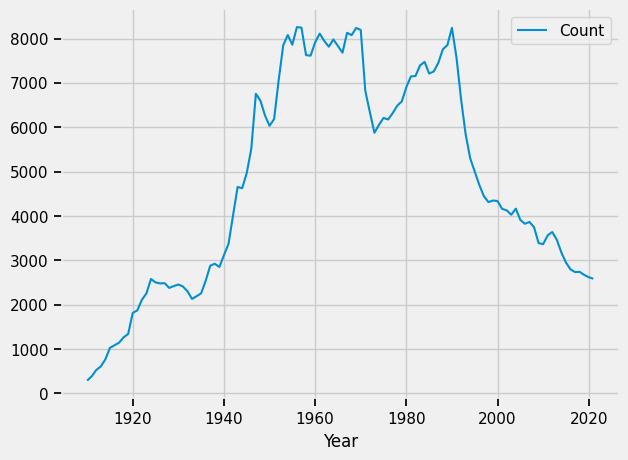

In [73]:
babynames.head(5)
babynames.groupby("Year").agg(ammd).plot();

In [75]:
for i, (k, v) in enumerate(babynames.groupby("Year")):
    if i >= 3: break
    print(f"Year: {k}")
    display(v.head())

Year: 1910


,State,Sex,Year,Name,Count
25,CA,F,1910,Edith,58
20,CA,F,1910,Edna,62
48,CA,F,1910,Marguerite,32
235898,CA,M,1910,Matthew,6
208,CA,F,1910,Billie,5


Year: 1911


,State,Sex,Year,Name,Count
449,CA,F,1911,Peggy,6
331,CA,F,1911,Velma,18
403,CA,F,1911,Gloria,8
464,CA,F,1911,Ina,5
236056,CA,M,1911,Merle,5


Year: 1912


,State,Sex,Year,Name,Count
749,CA,F,1912,Margery,6
757,CA,F,1912,Adelaide,5
738,CA,F,1912,Effie,6
538,CA,F,1912,Vivian,43
236083,CA,M,1912,Harry,100


In [76]:
babynames.groupby("Year").agg(ammd).head(5)

C:\Users\MM\AppData\Local\Temp\ipykernel_27096\3601074847.py:1: FutureWarning: ['State', 'Sex', 'Name'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  babynames.groupby("Year").agg(ammd).head(5)


,Count
Year,
1910,290
1911,385
1912,529
1913,609
1914,768


Goal 5: Finding the number of babies born in each year of each sex.

In [81]:
babynames.groupby(["Year", "Sex"]).agg(sum).head(6)

C:\Users\MM\AppData\Local\Temp\ipykernel_27096\1193884336.py:1: FutureWarning: The operation <built-in function sum> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  babynames.groupby(["Year", "Sex"]).agg(sum).head(6)


Count
Year Sex       
1910 F     5950
     M     3213
1911 F     6602
     M     3381
1912 F     9804
     M     8142

In [82]:
babynames.head(5)

,State,Sex,Year,Name,Count
105458,CA,F,1987,Emilyann,5
279368,CA,M,1969,Mckinley,5
121783,CA,F,1992,Anaiza,13
243396,CA,M,1927,Marcelino,7
183626,CA,F,2008,Shia,9


In [83]:
babynames_pivot = babynames.pivot_table(
    index='Year', # the rows (turned into index)
    columns='Sex', # the column values
    values=['Count', 'Name'], # the field(s) to processed in each group
    aggfunc=np.max, # group operation
)
babynames_pivot.head(6)

Count          Name         
Sex      F     M       F        M
Year                             
1910   295   237  Yvonne  William
1911   390   214   Zelma   Willis
1912   534   501  Yvonne  Woodrow
1913   584   614   Zelma   Yoshio
1914   773   769   Zelma   Yoshio
1915   998  1033    Zita    Yukio

In [84]:
(
babynames[babynames["Year"] == 2018]
    .sort_values(by = "Count", ascending = False)
    .head(5)
)

,State,Sex,Year,Name,Count
221179,CA,F,2018,Emma,2746
389400,CA,M,2018,Noah,2571
221180,CA,F,2018,Mia,2502
221181,CA,F,2018,Olivia,2467
389401,CA,M,2018,Liam,2415


In [88]:
(
babynames[babynames["Year"] == 2018]
    .sort_values(by = "Count", ascending = False)
    .head(5)
)

,State,Sex,Year,Name,Count
221179,CA,F,2018,Emma,2746
389400,CA,M,2018,Noah,2571
221180,CA,F,2018,Mia,2502
221181,CA,F,2018,Olivia,2467
389401,CA,M,2018,Liam,2415


In [86]:
def ammd2(L):
    return max(L) - min(L)

print(ammd2([1, 2, 3, 4, 5]))

4


In [87]:
ammd2 = lambda L: max(L) - min(L)
print(ammd2([1, 2, 3, 4, 5]))

4
